## Title: Exploring the Architecture of Shallow Neural Networks: A Mathematical Perspective

**Introduction:**
This Jupyter notebook is dedicated to the exploration of shallow neural network architecture and provides an extensive mathematical understanding of the basics of forward propagation and backpropagation in neural networks.

**Objectives:**
- The basic architecture of shallow neural networks will be comprehended.
- A detailed explanation of forward propagation, where inputs are processed through the network to produce predictions, will be provided.
- Insights into backpropagation, the key mechanism for training neural networks by adjusting parameters to minimize prediction errors, will be gained.
- Forward and backward propagation algorithms will be implemented from scratch to deepen the understanding.

### Table of Contents

1.[Dataset](#dataset)

2.[Performance of logistic regression](#logisticregression)

3.[Shallow Neural Network Architecture](#ShallowNNArchitecture)

4.[Forward propagation](#Forwardpropagation)

5.[Backpropagation](#Backpropagation)

6.[Final model](#Finalmodel)

7.[Implementation](#Implementation)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set()
from sklearn import linear_model
from sklearn.datasets import make_circles

**Dataset**<a name = "Dataset"></a>

As per the sklearn User Guide on generated datasets, **make_circles** and **make_moons** generate 2D binary classification datasets that are challenging to certain algorithms (e.g. centroid-based clustering or linear classification), including optional Gaussian noise. They are useful for visualization. make_circles produces Gaussian data with a spherical decision boundary for binary classification, while make_moons produces two interleaving half circles

In [5]:
examples = 300
X,y = make_circles(n_samples = examples, shuffle= True, noise = 0.1, factor = 0.3,random_state = 42)
X=X.T
y=y.reshape(1,-1)
print('X shape',X.shape)
print('y.shape', y.shape)

X shape (2, 300)
y.shape (1, 300)


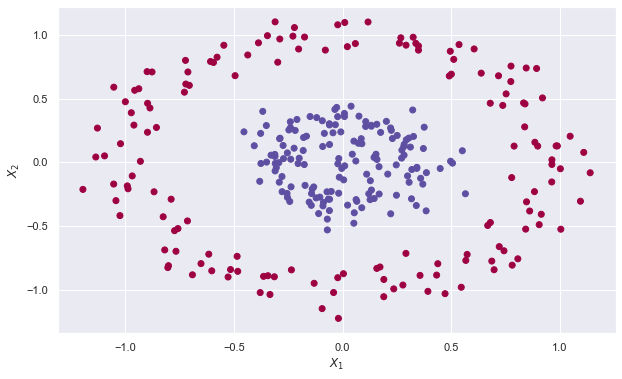

In [6]:
#Plotting the data X
plt.figure(figsize = (10,6))
plt.scatter(X[0,:],X[1,:],c = y, cmap = plt.cm.Spectral)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

**How logistic regression perform on such a dataset**<a name = "logisticregression"></a>

In [7]:
#Training the Logistic regression classifier
logisticClassifier = linear_model.LogisticRegressionCV()
logisticClassifier.fit(X.T,y.T.ravel());

In [8]:
def plotDecisionRegions(X,y,classifier,resolution=0.02):
    #set up marker generator and color map
    markers=('s','x','o','^','v')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min, x1_max=X[0,:].min()-1, X[0,:].max()+1
    x2_min, x2_max=X[1,:].min()-1, X[1,:].max()+1
    xx1, xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    Z=classifier(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    plt.figure(figsize=(10,6))
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    
    #plot class examples
    for idx,cl in enumerate(np.unique(y)):
        k = y==cl
        plt.scatter(
                    X[0,k.ravel()],
                    X[1,k.ravel()],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    facecolor='black')

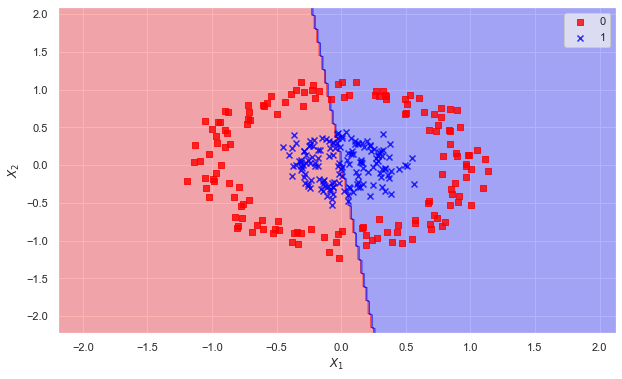

In [9]:
plotDecisionRegions(X,y,classifier = lambda x:logisticClassifier.predict(x))
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(loc = 'best')
plt.show()

In [10]:
logisticPredictions = logisticClassifier.predict(X.T)
#Accuracy of logisticPredictions
logisticAccuracy = np.sum(logisticPredictions == y)*100/y.size
print(f'The logisticClassifier classified the data with {logisticAccuracy:.2f}% accuracy')

The logisticClassifier classified the data with 49.33% accuracy


<a name = "ShallowNNArchitecture"></a>

### Shallow Neural Network Architecture

The neural network used in this notebook will have a single hidden layer. 

**Visual representation of the model architecture**
<img src="https://miro.medium.com/v2/resize:fit:1400/1*uzTQjsb5sKNED_45Cu5aUA.png" style="width:600px;height:300px;">


A shallow neural network with one hidden layer generally operates by processing input data through a series of interconnected nodes across its layers to produce an output. In this case, the network consists of three layers: an **input layer** (Layer 0), a **hidden layer** (Layer 1), and an **output layer** (Layer 2).

Each *circle*, or *node*, in the input layer represents a dimension of the input data. These nodes serve as inputs to each node in the hidden layer. Similarly, each node in the hidden layer contributes to the computation of nodes in the output layer.

For every node in both the hidden and output layers, there exists a **bias term** and a **Weight vector**. These parameters are essential for forming a *linear function*, denoted as **Z**, of the previous layer. The weight vector's dimensionality corresponds to the number of nodes in the previous layer.

After forming the linear function Z, an *activation function* is applied to its evaluation. This activation function introduces non-linearity into the network, allowing it to learn complex patterns in the data. The output of this activation function serves as the output of that layer.

Overall, the shallow neural network processes input data through interconnected nodes, applying weights and biases to compute linear functions, followed by activation functions to introduce non-linearity, ultimately producing an output from the output layer.


The general methodology to build a Neural Network involves:

    1. Defining the neural network structure ( # of input units,  # of hidden units, etc). 
    2. Initializing the model's parameters
    3. Loop until convergence on optimal parameters:
        - Implementing forward propagation
        - Computing cost
        - Implementing backward propagation to get the gradients
        - Updating parameters through gradient descent

<a name = "Forwardpropagation"></a>

### Forward propagation and cost computation

The process described above can be represented mathematically for both a single training example and an entire training dataset as a phase in the implementation of a neural network called **forward  propagation**:

### Single training example $x^{(i)}$  mathematical representation

$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}\tag{f1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{f2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}\tag{f3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{f4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{f5}$$

Generalizing the equations above to a training dataset involves considering the dimensions of various matrices and vectors involved 

### Training dataset mathematical representation with corresponding dimensions

**X**: data matrix of shape($n_x$, m). **$n_x$** represents the number of dimensions and **m** represents the number of training examples


**$W^{[1]}$** : Weight matrix for layer 1. Before transposition its shape is ($n_x$,$l^{[1]}$) where $l^{[1]}$ represents the 
number of nodes in layer 1. For each node in layer 1, there is a ($n_x$,1) column vector corresponding to each of the $n_x$ dimensions in X. These vectors from each layer 1 node are stacked together along the column axis to form the  ($n_x$,$l^{[1]}$) Weight matrix. The matrix is then transposed for correct mathematical computation to generate **$Z^{[1]}$** . Hence the final shape of **$W^{[1]}$** is ($l^{[1]}$,$n_x$)

**$b^{[1]}$** : The bias vector for layer 1. For each node in layer 1, there is one scalar bias term. These terms from each layer 1 node are stacked together along the row axis to form the ($l^{[1]}$, 1) bias vector

**$Z^{[1]} = W^{[1]}X + b^{[1]}$** : A (**$l^{[1]}$, m**) matrix where each row corresponds to the application of the linear function on the m training examples for each node in layer 1

**$A^{[1]}$** = $g^{[1]}$**($Z^{[1]}$)** : A (**$l^{[1]}$, m**) matrix generated from applying an activation function, $g^{[1]}$, on  **$Z^{[1]}$** .There are several activation functions one can choose from such as : *ReLU*, *leaky ReLU*, *tanh* or the *sigmoid function*. In this neural network, the tanh activation function, $\frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$, was used for the hidden layer and the sigmoid function, $\frac{1}{1 + e^{-x}}$ for the output layer

Reasons
Diagram

The **$A^{[1]}$** matrix then serves as input for the output layer and similar computations are carried out to yield the final output

**$W^{[2]}$** : Weight matrix for layer 2. Before transposition its shape is ($l^{[1]}$,$l^{[2]}$=1 ) where $l^{[1]}$ represents the number of nodes in layer 1 and $l^{[2]}$ represents the number of nodes in layer 2 which in this case is 1. The matrix is generated in a similar manner to **$W^{[1]}$** after which it is transposed to its final shape of ($l^{[2]}$=1,$l^{[1]}$) 

**$b^{[2]}$** : The bias vector for layer 2. For each node in layer 2, there is one scalar bias term. These terms from each layer 2 node are stacked together along the row axis to form the ($l^{[2]}$, 1) bias vector. Since in this case $l^{[2]}$=1, the bias vector is actually one scalar term

**$Z^{[2]} = W^{[2]}A^{[1]} + b^{[2]}$** : A ($l^{[2]}$=1, m) matrix where each row corresponds to the application of the linear function on the m training examples for the one node in layer 2

**$A^{[2]}$** = $g^{[2]}$**($Z^{[2]}$)** : A ($l^{[2]}$=1, m) matrix generated from applying an activation function, $g^{[2]}$(sigmoid function $\sigma$), on  **$Z^{[2]}$** . This ($l^{[2]}$=1, m) matrix is the final output of the neural network 

The matrices described above are useful in implementing the equations (f1) through (f5) on the entire training dataset as follows:

$$Z^{[1]} =  W^{[1]} X + b^{[1]}\tag{f1}$$ 
$$A^{[1]} = \tanh(Z^{[1]})\tag{f2}$$
$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}\tag{f3}$$
$$\hat{Y} = A^{[2]} = \sigma(Z^{[2]})\tag{f4}$$
$$Y_{prediction} = \begin{cases} 1 & \mbox{if } A^{[2]} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{f5}$$

These equations describe the forward propagation phase  from which the  **$A^{[2]}$** matrix can be used to compute the cost **J** on the m training examples as follows:
$$J = - \frac{1}{m}  \large\left(\small Y\log\left(A^{[2]}\right) + (1-Y)\log\left(1- A^{[2]}\right)  \large  \right) \small \tag{6}$$

#### Translating the Math to code

The model function prototype is

shallowNN(X,y,layerSize,learningRate,iterations)

The function will include helper functions for various steps taken when implementing the neural network

In [11]:
def initializeParameters(xDim, yDim, hiddenLayerLength):
    """Helper function to initialize the weight matrices and bias vectors used in the Neural Network
        Parameters:
        xDim(int): An integer describing the number of dimensions in the data matrix X
        yDim(int): An integer describing the number of dimensions in the target vector y
        hiddenLayerLength(int): An integer describing the number of nodes in the hidden layer
        
        Return:
        parameters(dict): A dictionary containing the initialized weights and biases"""
    W1 = np.random.randn(hiddenLayerLength, xDim)
    b1 = np.zeros((hiddenLayerLength,1))
    W2 = np.random.randn(yDim, hiddenLayerLength)
    b2 = np.zeros((yDim, 1))
    parameters = {'W1':W1, 'b1':b1, 'W2':W2, 'b2':b2}
    return parameters

In [12]:
def forwardPropagation(X, parameters):
    """Helper function to generate the output from the forward phase of implementing a neural network
        Parameters:
        X(np.array): A (xDim, m) data matrix of m training examples
        parameters(dict): A dictionary containing the weights and biases used in the neural network
        
        Return:
        A2(np.array): A (yDim, m) matrix that serves as the output of the Neural network
        backDict(dict): A dictionary containing results computed from forward propagation that will be used in implementing
                        back propagation"""
    #Retrieving the parameters
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    #Performing the forward propagation calculations
    Z1 = W1.dot(X) + b1
    A1 = np.tanh(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = 1/(1+np.exp(-Z2)) 
    backDict = {'A1':A1, 'A2':A2,'Z1':Z1, 'Z2':Z2}
    return A2, backDict
    

In [13]:
def computeCost(A2,y):
    """Helper function to implement the logistic regression cost function between the actual target y and the predictions A2
        Paramters:
        A2(np.array): A (yDim, m) matrix that serves as the output of the Neural network
        y(np.array):  A (yDim, m) matrix that has the actual target output
        
        Return:
        J(float): A float representing the evaluation of the logistic regression cost function"""
    J = -np.mean((y*np.log(A2) + (1-y)*np.log(1-A2)))
    return J

<a name = "Backpropagation"></a>

### Backpropagation and parameter updates

Backpropagation is the core algorithm used to train neural networks by iteratively updating parameters to minimize the cost function. In a shallow neural network with one hidden layer, backpropagation involves computing gradients of the cost function with respect to the parameters and using these gradients to update the parameters.

During forward propagation, the neural network processes training data to make predictions. Then, during the backward pass, gradients of the cost function, denoted as J, with respect to the parameters are computed using the chain rule of calculus. These gradients represent the direction and magnitude of change needed to decrease the cost function.

Once the gradients are computed, the parameters are updated in the opposite direction of the gradient to minimize the cost function. This update is performed iteratively using a technique called *gradient descent*. In each iteration, the parameters are adjusted by subtracting a fraction of the gradient multiplied by a learning rate, which controls the size of the updates.

The process continues until the parameters converge to values that minimize the cost function. This convergence indicates that the neural network has learned the underlying patterns in the training data and can make accurate predictions on new data.

General working of the chain rule.
If P is a function of Q and Q is a function of R then:
$$ \frac {\partial P} {\partial R} = \frac {\partial P} {\partial Q} . \frac {\partial Q} {\partial R}$$

#### Mathematical implementation of Backpropagation

$$ \frac {\partial J}{\partial Z^{[2]}} = \frac {\partial J}{\partial A^{[2]}}.\frac {\partial A^{[2]}}{\partial Z^{[2]}}$$
$\frac {\partial J}{\partial A^{[2]}}$ = $\frac {(1-Y)}{1-A^{[2]}} - \frac {Y}{A^{[2]}}$

$\frac {\partial A^{[2]}}{\partial Z^{[2]}}$ = $A^{[2]}(1-A^{[2]})$. The derivative of $\sigma$(x) *w.r.t* x is $\sigma$(x).(1-$\sigma$(x))

$\therefore \frac {\partial J}{\partial Z^{[2]}} = A^{[2]} - Y \tag{b1}$ with shape ($l^{[2]}$=1,m) 

$$ \frac {\partial J}{\partial W^{[2]}} = \frac {\partial J}{\partial Z^{[2]}}.\frac {\partial Z^{[2]}}{\partial W^{[2]}}$$
$\frac {\partial Z^{[2]}}{\partial W^{[2]}}$ = $A^{[1]T}$

$\therefore \frac {\partial J}{\partial W^{[2]}} = \frac{1}{m}.(A^{[2]} - Y).(A^{[1]T}) \tag{b2}$ with shape ($l^{[2]}$=1,$l^{[1]}$) 

$$ \frac {\partial J}{\partial b^{[2]}} = \frac {\partial J}{\partial Z^{[2]}}.\frac {\partial Z^{[2]}}{\partial b^{[2]}}$$
$\frac {\partial Z^{[2]}}{\partial b^{[2]}}$ = $1$

$\therefore \frac {\partial J}{\partial b^{[2]}} = np.mean((A^{[2]} - Y), axis = 1, keepdims=True) \tag{b3}$ with shape ($l^{[2]}$=1,1) 

$$ \frac {\partial J}{\partial Z^{[1]}} = \frac {\partial J}{\partial A^{[1]}}.\frac {\partial A^{[1]}}{\partial Z^{[1]}}$$
$\frac {\partial J}{\partial A^{[1]}}$ = $W^{[2]T}.(A^{[2]}-Y)$

$\frac {\partial A^{[1]}}{\partial Z^{[1]}}$ = $g^{'}(Z^{[1]})$

$\therefore \frac {\partial J}{\partial Z^{[1]}} = (W^{[2]T}.(A^{[2]}-Y))*g^{'}(Z^{[1]})\tag{b4}$ with shape ($l^{[1]}$,m) 
The $*$ indicates an element-wise multiplication as both matrices have the same shape. $g^{'}$ indicates the derivative of $tanh(z)$ *w.r.t* z which equates to 1 - $tanh(z)^{2}$

$$ \frac {\partial J}{\partial W^{[1]}} = \frac {\partial J}{\partial Z^{[1]}}.\frac {\partial Z^{[1]}}{\partial W^{[1]}}$$
$\frac {\partial Z^{[1]}}{\partial W^{[1]}}$ = $X^{T}$

$\therefore \frac {\partial J}{\partial W^{[1]}} = \frac{1}{m}[(W^{[2]T}.(A^{[2]}-Y))*g^{'}(Z^{[1]})].X^{T}\tag{b5}$ with shape ($l^{[1]}, n_{x}$)

$$ \frac {\partial J}{\partial b^{[1]}} = \frac {\partial J}{\partial Z^{[1]}}.\frac {\partial Z^{[1]}}{\partial b^{[1]}}$$
$\frac {\partial Z^{[1]}}{\partial b^{[1]}}$ = 1

$\therefore \frac {\partial J}{\partial b^{[1]}} = np.mean((W^{[2]T}.(A^{[2]}-Y))*g^{'}(Z^{[1]}),axis=1,keepdims=True)\tag{b6}$ with shape ($l^{[1]}, 1$)

These $6$ equations describe the process of backpropagation through which the model's parameters can be updated.
For every parameter $\theta$, the gradient descent update rule is as follows:

$$\theta := \theta - \alpha\frac {\partial J}{\partial \theta}$$
where $\alpha$ represents the learning rate at which the parameters are updated

#### Translating the Math to code

In [14]:
def backPropagation(X,y,backDict, parameters):
    """Helper function to perform back propagation on the neural network
        Parameters:
        X(np.array): A (xDim, m) data matrix of m training examples
        y(np.array): A (yDim, m) matrix that has the actual target output
        backDict(dict): A dictionary containing the results of the forward propagation phase
        parameters(dict): A dictionary containing the weights and biases used in the neural network
        
        Return:
        gradDict(dict): A dictionary containing the partial derivatives computed from the backpropagation phase"""
    m = X.shape[1]
    A1 = backDict['A1']
    A2 = backDict['A2']
    W2 = parameters['W2']
    dZ2 = A2 - y
    dW2 = (1/m)*(dZ2.dot(A1.T))
    db2 = np.mean(dZ2, axis = 1, keepdims = True)
    dZ1 = (W2.T.dot(dZ2))*(1-A1**2) #the derivative of leakyReLU  w.r.t z is 1-(tanh(z))^2
    dW1 = (1/m)*(dZ1.dot(X.T))
    db1 = np.mean(dZ1,axis=1,keepdims=True)
    gradDict = {'dZ2':dZ2, 'dW2':dW2,'db2':db2,'dZ1':dZ1, 'dW1':dW1, 'db1':db1}
    return gradDict

In [15]:
def updateParameters(parameters,gradDict, learningRate):
    """Helper function to update the model's parameters using the gradient matrices from back propagation
        Parameters:
        parameters(dict): A dictionary containing the weights and biases used in the neural network
        gradDict(dict): A dictionary containing the partial derivatives computed from the backpropagation phase
        learningRate(float): A float that determines the rate/pace of gradient descent
        
        Return:
        parameters(dict): A dictionary containing the  updated weights and biases used in the neural network"""
    #Retrieving the parameters
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    #Retrieving the gradient vectors & matrices
    dW1 = gradDict['dW1']
    db1 = gradDict['db1']
    dW2 = gradDict['dW2']
    db2 = gradDict['db2']
    
    #Updating the parameters using the gradient descent rule
    W1 = W1 - learningRate*dW1
    b1 = b1 - learningRate*db1
    W2 = W2 - learningRate*W2
    b2 = b2 - learningRate*b2
    parameters = {'W1':W1, 'b1':b1, 'W2':W2, 'b2':b2}
    return parameters

<a name  = "Finalmodel"></a>

### The final model

In [18]:
def shallowNNFit(X, y, hiddenLayerLength, learningRate=1e-5, iterations=int(1e5)):
    """Main model function to fit the training data
        Parameters:
        X(np.array): A (xDim, m) data matrix of m training examples
        y(np.array): A (yDim, m) matrix that has the actual target output
        hiddenLayerLength(int): An integer describing the number of nodes in the hidden layer
        learningRate(float): A float that determines the rate/pace of gradient descent
        iterations(int): Number of iterations to perform forward and backpropagation as well as the update of parameters
        
        Return:
        parameters(dict): A dictionary containing the optimal weights and biases used in the neural network"""
    np.random.seed(1)
    xDim = X.shape[0]
    yDim = y.shape[0]
    costs = [] # a list to store the costs after every 100 iterations
    #Get the inital weights
    parameters = initializeParameters(xDim,yDim,hiddenLayerLength)
    
    #Updating the parameters through gradient descent over many iterations
    for i in range(iterations):
        A2, backDict = forwardPropagation(X,parameters)
        cost = computeCost(A2, y)
        if i%100 == 0:
            costs.append(cost)
        gradDict = backPropagation(X,y,backDict,parameters)
        parameters = updateParameters(parameters,gradDict, learningRate)
    return parameters, costs    

In [43]:
def shallowNNPredict(X, parameters):
    """Main model function to predict output based on input data
        Parameters:
        X(np.array): A (xDim, n) data matrix of m test examples
        parameters(dict): A dictionary containing the optimal weights and biases used in the neural network
        
        Return:
        predictions(np.array): A (yDim, n) data matrix/vector of predicted output"""
    A2, backDict = forwardPropagation(X, parameters)
    predictions = np.where(A2>0.5,1,0)
    return predictions

<a name = "Implementation"></a>

### Implementation of the Single hidden layer Neural Network on the dataset

In [42]:
#finding the most optimal hyper parameters for the Neural network
#lengths = list(range(1,800))
#alpha = list(range(11))
#accuracies=[]
#for i in range(len(lengths)):
    #for j in range(len(alpha)):
        #optimalParameters, costs = shallowNNFit(X,y,hiddenLayerLength = lengths[i], learningRate = 10**(-alpha[j]))
        #yHat = shallowNNPredict(X, optimalParameters)
        #shallowNNAccuracy = np.sum(yHat == y)*100/y.size
        #accuracies.append((alpha[j],shallowNNAccuracy))
#alpha,length, accuracy = max(accuracies, key = lambda x: x[1])
#alpha,length, accuracy

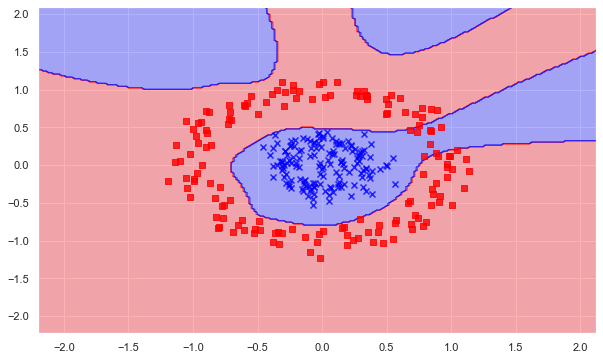

In [40]:
optimalParameters, costs = shallowNNFit(X,y,hiddenLayerLength = 778, learningRate = 1e-5)
yHat = shallowNNPredict(X, optimalParameters)
plotDecisionRegions(X,y,classifier = lambda x:shallowNNPredict(x.T,optimalParameters))

In [41]:
#Accuracy of ShallowNNPredictions
shallowNNAccuracy = np.sum(yHat == y)*100/y.size
print(f'The Single Layer Neural Network classified the data with {shallowNNAccuracy:.2f}% accuracy')

The Single Layer Neural Network classified the data with 97.33% accuracy


The results above indicate that the shallow neural network has performed significantly better than the logistic regression. In scenarios where the decision boundary is non-linearly separable, shallow neural networks offer a distinct advantage over logistic regression. Unlike logistic regression, which can only model linear decision boundaries, shallow neural networks can capture complex, non-linear relationships between features and labels. This enables them to achieve higher accuracy by effectively delineating boundaries between different classes in the data.

However, the effectiveness of shallow neural networks often comes at the cost of scalability and efficiency. In the neural network above, it took over *700 nodes* in the hidden layer for the shallow neural network to achieve the desired level of accuracy. This highlights a weakness of shallow neural networks when compared to their deep counterparts. According to the circuit theory, shallow networks with a large number of nodes may struggle to generalize effectively, requiring an exponential increase in the number of neurons to achieve accuracy comparable to deep networks. This limitation underscores the challenge of shallow neural networks in balancing model complexity and computational resources, particularly in complex classification tasks.